# **Delete everything in the DWH DB with this Query below**

In [1]:

USE ERP
GO
CREATE PROCEDURE usp_DropDatabase
    @DatabaseName NVARCHAR(128)
AS
BEGIN
    SET NOCOUNT ON;

    DECLARE @KillCommand NVARCHAR(MAX);
    DECLARE @Sql NVARCHAR(MAX);

    -- Initialize the command to kill active connections
    SET @KillCommand = '';

    -- Build the kill command for each active connection, excluding the current session
    SELECT @KillCommand = @KillCommand + 'KILL ' + CONVERT(NVARCHAR(10), session_id) + ';'
    FROM sys.dm_exec_sessions
    WHERE database_id = DB_ID(@DatabaseName) AND session_id <> @@SPID;

    -- Execute the kill commands
    EXEC sp_executesql @KillCommand;

    -- Drop the database
    SET @Sql = N'DROP DATABASE IF EXISTS [' + @DatabaseName + ']';
    EXEC sp_executesql @Sql;
END

GO

/*
Anlegen der grundsätzlichen Datenbankobjekte (Datenbank, Schema)
*/

-- Ausführen der Helper Stored Procedure um die Datenbank zu löschen
EXEC usp_DropDatabase 'dwh'

CREATE DATABASE dwh COLLATE SQL_Latin1_General_CP1_CI_AS; -- Gleiche Collation wie die ERP Datenbank


Commands completed successfully.

: Msg 2714, Level 16, State 3, Procedure usp_DropDatabase, Line 1
There is already an object named 'usp_DropDatabase' in the database.

Commands completed successfully.

Total execution time: 00:00:00.714

# **TO Update All Data in the Table just run the Cell below**

In [36]:
EXEC Transfer_Sales_SalesOrderHeader
EXEC Transfer_Sales_SalesOrderDetail
EXEC Transfer_Production_Product
EXEC ETL_Growth_Facttable @Betrachtungsjahr = 2014

EXEC Transfer_Sales_SalesOrderHeader
EXEC Transfer_Sales_SalesOrderDetail
EXEC Transfer_Production_ProductInventory
EXEC Transfer_Production_Product
EXEC ETL_SalesTrends_Facttable

EXEC Transfer_Sales_SalesPerson
EXEC Transfer_Sales_SalesTerritory
EXEC ETL_TerritorySales_Facttable

EXEC ETL_SalesTrendsSpecified_Facttable 'AWC Logo Cap' --Here you could change the Filtered Product Example ML Road Tire

(31465 rows affected)

(121317 rows affected)

(504 rows affected)

(31465 rows affected)

(121317 rows affected)

(1069 rows affected)

(504 rows affected)

(17 rows affected)

(10 rows affected)

Total execution time: 00:00:03.686

# **run the Query underneath with running all Code below**

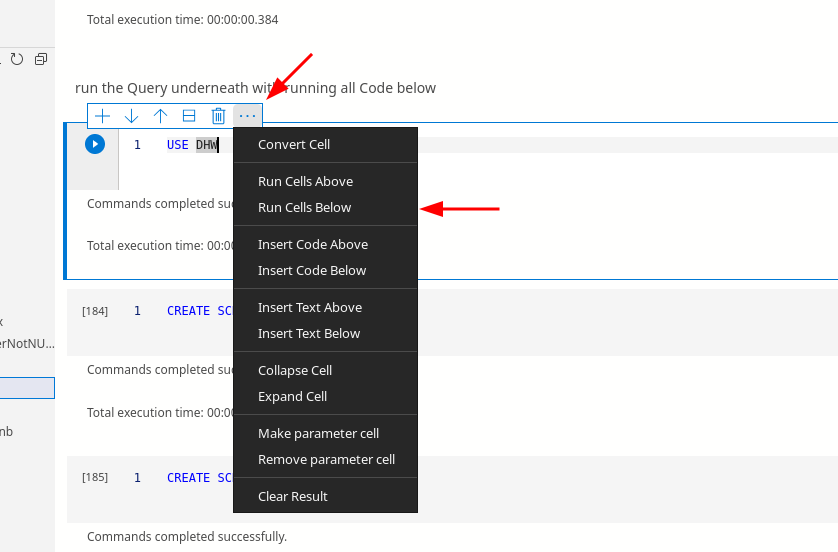

In [2]:
USE dwh

Commands completed successfully.

Total execution time: 00:00:00.055

In [3]:

CREATE SCHEMA staging

Commands completed successfully.

Total execution time: 00:00:00.054

In [4]:
CREATE SCHEMA DWH_SalesTrends

Commands completed successfully.

Total execution time: 00:00:00.046

In [5]:
CREATE SCHEMA DWH_SalesTrendsSpecified

Commands completed successfully.

Total execution time: 00:00:00.039

In [6]:
CREATE SCHEMA DWH_TerritorySales

Commands completed successfully.

Total execution time: 00:00:00.089

In [7]:
CREATE SCHEMA DWH_Growth

Commands completed successfully.

Total execution time: 00:00:00.075

## Transfer Table into staging - Silja

In [8]:
USE DWH;
GO
CREATE PROCEDURE "Transfer_Sales_SalesOrderHeader"
(
@SourceDB VARCHAR(50)= "ERP",
@SourceSchemaTable VARCHAR(50)= "Sales.SalesOrderHeader",
@DestinationDB VARCHAR(50) = "DWH",
@DestinationSchemaTable VARCHAR(50) = "staging.Staging_SalesOrderHeader"
)AS
BEGIN
DECLARE @SQL NVARCHAR(MAX)
    DECLARE @FullyQualifiedDestinationTable NVARCHAR(128) = @DestinationDB + '.' + @DestinationSchemaTable;

BEGIN TRY
    IF OBJECT_ID(@FullyQualifiedDestinationTable, 'U') IS NOT NULL
    BEGIN
        SET @SQL = 'DROP TABLE ' + @FullyQualifiedDestinationTable;
        EXEC sp_executesql @SQL;
    END


SET @SQL = N'SELECT * INTO ' + @DestinationDB + '.' + @DestinationSchemaTable + ' FROM ' + @SourceDB + '.' + @SourceSchemaTable
EXEC sp_executesql @SQL;

END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
Go

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.121

In [9]:
USE DWH;
GO
CREATE PROCEDURE "Transfer_Sales_SalesOrderDetail"
(
@SourceDB VARCHAR(50)= "ERP",
@SourceSchemaTable VARCHAR(50)= "Sales.SalesOrderDetail",
@DestinationDB VARCHAR(50) = "DWH",
@DestinationSchemaTable VARCHAR(50) = "staging.Staging_SalesOrderDetail"
)AS
BEGIN
DECLARE @SQL NVARCHAR(MAX)
    DECLARE @FullyQualifiedDestinationTable NVARCHAR(128) = @DestinationDB + '.' + @DestinationSchemaTable;

BEGIN TRY
    IF OBJECT_ID(@FullyQualifiedDestinationTable, 'U') IS NOT NULL
    BEGIN
        SET @SQL = 'DROP TABLE ' + @FullyQualifiedDestinationTable;
        EXEC sp_executesql @SQL;
    END


SET @SQL = N'SELECT * INTO ' + @DestinationDB + '.' + @DestinationSchemaTable + ' FROM ' + @SourceDB + '.' + @SourceSchemaTable
EXEC sp_executesql @SQL;
END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
Go

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.091

In [10]:
USE DWH;
GO
CREATE PROCEDURE "Transfer_Production_Product"
(
@SourceDB VARCHAR(50)= "ERP",
@SourceSchemaTable VARCHAR(50)= "Production.Product",
@DestinationDB VARCHAR(50) = "DWH",
@DestinationSchemaTable VARCHAR(50) = "staging.Staging_Product"
)AS
BEGIN
DECLARE @SQL NVARCHAR(MAX)

BEGIN TRY
    DECLARE @FullyQualifiedDestinationTable NVARCHAR(128) = @DestinationDB + '.' + @DestinationSchemaTable;

    -- Check if the destination table exists and drop it if necessary
    IF OBJECT_ID(@FullyQualifiedDestinationTable, 'U') IS NOT NULL
    BEGIN
        SET @SQL = 'DROP TABLE ' + @FullyQualifiedDestinationTable;
        EXEC sp_executesql @SQL;
    END

SET @SQL = N'SELECT * INTO ' + @DestinationDB + '.' + @DestinationSchemaTable + ' FROM ' + @SourceDB + '.' + @SourceSchemaTable
EXEC sp_executesql @SQL;

END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
Go

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.113

## ETL - Silja

In [11]:
Use DWH;
GO
CREATE PROCEDURE CreateYearsTable
AS
BEGIN
    SET NOCOUNT ON;

BEGIN TRY

    IF OBJECT_ID('DWH.DWH_Growth.Dim_Years', 'U') IS NOT NULL
    BEGIN
        DROP TABLE DWH.DWH_Growth.Dim_Years; 
    END

    CREATE TABLE [DWH].[DWH_Growth].Dim_Years (
        SalesYear INT ,      
        YearID INT PRIMARY KEY NOT NULL        
    );

    INSERT INTO [DWH].[DWH_Growth].Dim_Years (SalesYear, YearID)
    VALUES 
        (1, 2011),
        (2, 2012),
        (3, 2013),
        (4, 2014);

END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
GO


Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.107

In [12]:
USE DWH;
GO

CREATE PROCEDURE ETL_Growth_ProductID
AS
BEGIN
    SET NOCOUNT ON;

    DECLARE @TableToCreate NVARCHAR(128) = 'DWH.DWH_Growth.Dim_ProductID';
    DECLARE @SQL NVARCHAR(MAX);

    BEGIN TRY

    IF OBJECT_ID(@TableToCreate, 'U') IS NOT NULL
    BEGIN
        SET @SQL = 'DROP TABLE ' + @TableToCreate;
        EXEC sp_executesql @SQL;
    END

    SET @SQL = 'CREATE TABLE ' + @TableToCreate + ' (
        ProductID INT PRIMARY KEY,
        Produktname VARCHAR(MAX)
    )';
    EXEC sp_executesql @SQL;

-- Define the SELECT DISTINCT AND THE COLUMNS we want to select
    SET @SQL = 'INSERT INTO ' + @TableToCreate + ' (ProductID, Produktname)
    SELECT DISTINCT pr.ProductID, 
pr.Name as Produktname
FROM  
    staging.Staging_SalesOrderHeader sh  
LEFT OUTER JOIN  
    staging.Staging_SalesOrderDetail sd ON sh.SalesOrderID = sd.SalesOrderID 
LEFT OUTER JOIN  
    staging.Staging_Product pr ON sd.ProductID = pr.ProductID';
    EXEC sp_executesql @SQL;

    END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
GO




Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.130

In [13]:
USE DWH;
GO

CREATE PROCEDURE ETL_Growth_Facttable(
    @Betrachtungsjahr INT
)
AS
BEGIN
    SET NOCOUNT ON;

    DECLARE @TableToCreate NVARCHAR(128) = 'DWH.DWH_Growth.Facttable';
    DECLARE @SQL NVARCHAR(MAX);
    DECLARE @Year NVARCHAR(10) = CAST(@Betrachtungsjahr AS NVARCHAR);

    BEGIN TRY

    IF OBJECT_ID(@TableToCreate, 'U') IS NOT NULL
    BEGIN
        DECLARE @DropFKSQL NVARCHAR(MAX);
        SET @DropFKSQL = N'';

        SELECT @DropFKSQL = @DropFKSQL + 'ALTER TABLE ' + QUOTENAME(OBJECT_NAME(parent_object_id)) + 
                            ' DROP CONSTRAINT ' + QUOTENAME(name) + '; '
        FROM sys.foreign_keys
        WHERE referenced_object_id = OBJECT_ID(@TableToCreate);

        EXEC sp_executesql @DropFKSQL;

        SET @SQL = 'DROP TABLE ' + @TableToCreate;
        EXEC sp_executesql @SQL;
    END
    EXEC ETL_Growth_ProductID
    EXEC CreateYearsTable

    SET @SQL = 'CREATE TABLE ' + @TableToCreate + ' (
        ProductID INT FOREIGN KEY REFERENCES DWH_Growth.Dim_ProductID(ProductID) NOT NULL,
        Produktnummer NVARCHAR(50) NULL,
        Umsatz_Vorjahr DECIMAL(18, 6) NULL,
        Umsatz_Betrachtungsjahr DECIMAL(18, 6) NULL,
        Wachstum DECIMAL(18, 6) NULL,
        Betrachtungsjahr INT FOREIGN KEY REFERENCES DWH_Growth.Dim_Years(YearID) NULL
    )';
    EXEC sp_executesql @SQL;

    SET @SQL = '
    INSERT INTO ' + @TableToCreate + ' (ProductID, Produktnummer, Umsatz_Vorjahr, Umsatz_Betrachtungsjahr, Wachstum, Betrachtungsjahr)
    SELECT DISTINCT 
        pr.ProductID,  
        pr.ProductNumber AS Produktnummer,
        -- Umsatz Vorjahr
        SUM(CASE WHEN YEAR(sh.OrderDate) = ' + @Year + ' - 1 THEN sd.LineTotal ELSE 0 END) AS Umsatz_Vorjahr,  
        -- Umsatz Betrachtungsjahr
        SUM(CASE WHEN YEAR(sh.OrderDate) = ' + @Year + ' THEN sd.LineTotal ELSE 0 END) AS Umsatz_Betrachtungsjahr,  
        -- Wachstum
        CASE  
            WHEN SUM(CASE WHEN YEAR(sh.OrderDate) = ' + @Year + ' THEN sd.LineTotal ELSE 0 END) > 0 THEN  
                100.0 * (
                    SUM(CASE WHEN YEAR(sh.OrderDate) = ' + @Year + ' THEN sd.LineTotal ELSE 0 END) - 
                    SUM(CASE WHEN YEAR(sh.OrderDate) = ' + @Year + ' - 1 THEN sd.LineTotal ELSE 0 END)
                ) / NULLIF(SUM(CASE WHEN YEAR(sh.OrderDate) = ' + @Year + ' - 1 THEN sd.LineTotal ELSE 0 END), 0)
            ELSE NULL
        END AS Wachstum,  
        ' + @Year + ' AS Betrachtungsjahr  
    FROM  
        staging.Staging_SalesOrderHeader sh  
    LEFT OUTER JOIN  
        staging.Staging_SalesOrderDetail sd ON sh.SalesOrderID = sd.SalesOrderID 
    LEFT OUTER JOIN  
        staging.Staging_Product pr ON sd.ProductID = pr.ProductID
    WHERE 
        YEAR(sh.OrderDate) IN (' + @Year + ' - 1, ' + @Year + ')
    GROUP BY  
        pr.ProductNumber,
        pr.ProductID';
    
    EXEC sp_executesql @SQL;
    END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
GO


Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.155

In [14]:
EXEC Transfer_Sales_SalesOrderHeader
EXEC Transfer_Sales_SalesOrderDetail
EXEC Transfer_Production_Product
EXEC ETL_Growth_Facttable @Betrachtungsjahr = 2014

(31465 rows affected)

(121317 rows affected)

(504 rows affected)

Total execution time: 00:00:01.183

Notize für mich selber

  

Ich han jz 2 PK Tables erstellt mit en index für Years und product ID

Ich glaub das nechste weri den de FactsTable zmache und de bürst nomal dure mache yk how it goes rock and roll

## Alem Transfer Table into staging

In [15]:
USE DWH;
GO
CREATE PROCEDURE "Transfer_Production_ProductInventory"
(
@SourceDB VARCHAR(50)= "ERP",
@SourceSchemaTable VARCHAR(50)= "Production.ProductInventory",
@DestinationDB VARCHAR(50) = "DWH",
@DestinationSchemaTable VARCHAR(50) = "staging.Staging_ProductInventory"
)AS
BEGIN
DECLARE @SQL NVARCHAR(MAX)
    DECLARE @FullyQualifiedDestinationTable NVARCHAR(128) = @DestinationDB + '.' + @DestinationSchemaTable;

BEGIN TRY
    IF OBJECT_ID(@FullyQualifiedDestinationTable, 'U') IS NOT NULL
    BEGIN
        SET @SQL = 'DROP TABLE ' + @FullyQualifiedDestinationTable;
        EXEC sp_executesql @SQL;
    END

IF OBJECT_ID(@DestinationDB + @DestinationSchemaTable, 'U') IS NOT NULL
BEGIN
SET @SQL = 'DROP TABLE ' + @DestinationDB + @DestinationSchemaTable;
EXEC sp_executesql @SQL;
END
SET @SQL = N'SELECT * INTO ' + @DestinationDB + '.' + @DestinationSchemaTable + ' FROM ' + @SourceDB + '.' + @SourceSchemaTable
EXEC sp_executesql @SQL;
END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
Go

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.137

## ETL - Alem

In [16]:
USE DWH;
GO

CREATE PROCEDURE ETL_SalesTrends_ProductID
AS
BEGIN
    SET NOCOUNT ON;

    DECLARE @TableToCreate NVARCHAR(128) = 'DWH.DWH_SalesTrends.Dim_ProductID';
    DECLARE @SQL NVARCHAR(MAX);
    BEGIN TRY

    IF OBJECT_ID(@TableToCreate, 'U') IS NOT NULL
    BEGIN
        SET @SQL = 'DROP TABLE ' + @TableToCreate;
        EXEC sp_executesql @SQL;
    END

    SET @SQL = 'CREATE TABLE ' + @TableToCreate + ' (
        ProductID INT PRIMARY KEY,
        Produktname VARCHAR(MAX)
    )';
    EXEC sp_executesql @SQL;

-- Define the SELECT DISTINCT AND THE COLUMNS we want to select
    SET @SQL = 'INSERT INTO ' + @TableToCreate + ' (ProductID, Produktname)
    SELECT DISTINCT pr.ProductID, 
pr.Name as Produktname
FROM  
    staging.Staging_SalesOrderHeader sh  
LEFT OUTER JOIN  
    staging.Staging_SalesOrderDetail sd ON sh.SalesOrderID = sd.SalesOrderID 
LEFT OUTER JOIN  
    staging.Staging_Product pr ON sd.ProductID = pr.ProductID';
    EXEC sp_executesql @SQL;
    END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
GO




Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.085

In [17]:
Use DWH;
GO
CREATE PROCEDURE SalesTrends_CreateYearsTable
AS
BEGIN
    SET NOCOUNT ON;
    BEGIN TRY


    IF OBJECT_ID('DWH.DWH_SalesTrends.Dim_Years', 'U') IS NOT NULL
    BEGIN
        DROP TABLE DWH.DWH_SalesTrends.Dim_Years; 
    END

    CREATE TABLE [DWH].[DWH_SalesTrends].Dim_Years (
        SalesYear INT ,      
        YearID INT PRIMARY KEY NOT NULL        
    );

    INSERT INTO [DWH].[DWH_SalesTrends].Dim_Years (SalesYear, YearID)
    VALUES 
        (1, 2011),
        (2, 2012),
        (3, 2013),
        (4, 2014),
        (5, 2015);
        END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
GO


Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.119

In [18]:
USE DWH;
GO

CREATE PROCEDURE SalesTrends_CreateMonthTable
AS
BEGIN
    SET NOCOUNT ON;
    BEGIN TRY

    IF OBJECT_ID('DWH.DWH_SalesTrends.Dim_Month', 'U') IS NOT NULL
    BEGIN
        DROP TABLE DWH.DWH_SalesTrends.Dim_Month; 
    END

    CREATE TABLE [DWH].[DWH_SalesTrends].Dim_Month (
        MonthID INT PRIMARY KEY NOT NULL,
        MonthName NVARCHAR(50) NOT NULL
    );

    INSERT INTO [DWH].[DWH_SalesTrends].Dim_Month (MonthID, MonthName)
    VALUES 
        (1, 'January'),
        (2, 'February'),
        (3, 'March'),
        (4, 'April'),
        (5, 'May'),
        (6, 'June'),
        (7, 'July'),
        (8, 'August'),
        (9, 'September'),
        (10, 'October'),
        (11, 'November'),
        (12, 'December');
        END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
GO


Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.170

In [19]:
CREATE PROCEDURE ETL_SalesTrends_Facttable
AS
BEGIN
    SET NOCOUNT ON;

    DECLARE @TableToCreate NVARCHAR(128) = 'DWH.DWH_SalesTrends.Facttable';
    DECLARE @SQL NVARCHAR(MAX);

    BEGIN TRY

    IF OBJECT_ID(@TableToCreate, 'U') IS NOT NULL
    BEGIN
        DECLARE @DropFKSQL NVARCHAR(MAX);
        SET @DropFKSQL = N'';

        SELECT @DropFKSQL = @DropFKSQL + 'ALTER TABLE ' + QUOTENAME(OBJECT_NAME(parent_object_id)) + 
                            ' DROP CONSTRAINT ' + QUOTENAME(name) + '; '
        FROM sys.foreign_keys
        WHERE referenced_object_id = OBJECT_ID(@TableToCreate);

        EXEC sp_executesql @DropFKSQL;

        -- Drop the table
        SET @SQL = 'DROP TABLE ' + @TableToCreate;
        EXEC sp_executesql @SQL;
    END

    -- Call other stored procedures
    EXEC ETL_SalesTrends_ProductID;
    EXEC SalesTrends_CreateYearsTable;
    EXEC SalesTrends_CreateMonthTable;

    -- Create the Facttable
    SET @SQL = 'CREATE TABLE ' + @TableToCreate + ' (
        ProductID INT FOREIGN KEY REFERENCES DWH.DWH_SalesTrends.Dim_ProductID(ProductID) NOT NULL,
        SalesOrderMonth INT FOREIGN KEY REFERENCES DWH.DWH_SalesTrends.Dim_Month(MonthID) NOT NULL,
        SalesOrderYear INT FOREIGN KEY REFERENCES DWH.DWH_SalesTrends.Dim_Years(YearID) NOT NULL,
        TotalStock INT,
        AvgMonthlySales DECIMAL(18, 2),
        MonthsOfStockRemaining DECIMAL(18, 2)
    )';
    EXEC sp_executesql @SQL;

    -- Insert the calculated data
    SET @SQL = '
    WITH SalesTrends AS (
        SELECT
            P.ProductID,
            P.Name AS ProductName,
            MONTH(SOH.OrderDate) AS SalesOrderMonth,
            YEAR(SOH.OrderDate) AS SalesOrderYear,
            SUM(SOD.OrderQty) AS SoldQtyPerMonth
        FROM
            staging.Staging_SalesOrderDetail SOD
        JOIN
            staging.Staging_SalesOrderHeader SOH ON SOD.SalesOrderID = SOH.SalesOrderID
        JOIN
            staging.Staging_Product P ON SOD.ProductID = P.ProductID
        GROUP BY
            P.ProductID,
            P.Name,
            MONTH(SOH.OrderDate),
            YEAR(SOH.OrderDate)
    ),
    StockLevels AS (
        SELECT
            PI.ProductID,
            SUM(PI.Quantity) AS TotalStock
        FROM
            staging.Staging_ProductInventory PI
        GROUP BY
            PI.ProductID
    )
    INSERT INTO DWH.DWH_SalesTrends.Facttable (ProductID, SalesOrderMonth, SalesOrderYear, TotalStock, AvgMonthlySales, MonthsOfStockRemaining)
    SELECT
        ST.ProductID,
        ST.SalesOrderMonth,
        ST.SalesOrderYear,
        SL.TotalStock,
        ST.SoldQtyPerMonth,
        CASE
            WHEN ST.SoldQtyPerMonth > 0 THEN ROUND(CAST(SL.TotalStock AS FLOAT) / ST.SoldQtyPerMonth, 2)
            ELSE NULL
        END AS MonthsOfStockRemaining
    FROM
        SalesTrends ST
    JOIN
        StockLevels SL ON ST.ProductID = SL.ProductID
    --WHERE ST.ProductName = @ProductName
    ORDER BY
        ST.ProductName;';

    EXEC sp_executesql @SQL;
    END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
GO


Commands completed successfully.

Total execution time: 00:00:00.068

In [20]:
EXEC Transfer_Sales_SalesOrderHeader
EXEC Transfer_Sales_SalesOrderDetail
EXEC Transfer_Production_ProductInventory
EXEC Transfer_Production_Product
EXEC ETL_SalesTrends_Facttable 

(31465 rows affected)

(121317 rows affected)

(1069 rows affected)

(504 rows affected)

Total execution time: 00:00:01.007

# ETL SalesTrendsSpecified -Alem

In [21]:
USE DWH;
GO

CREATE PROCEDURE ETL_SalesTrendsSpecified_ProductID
AS
BEGIN
    SET NOCOUNT ON;

    DECLARE @TableToCreate NVARCHAR(128) = 'DWH.DWH_SalesTrendsSpecified.Dim_ProductID';
    DECLARE @SQL NVARCHAR(MAX);
    BEGIN TRY

    IF OBJECT_ID(@TableToCreate, 'U') IS NOT NULL
    BEGIN
        SET @SQL = 'DROP TABLE ' + @TableToCreate;
        EXEC sp_executesql @SQL;
    END

    SET @SQL = 'CREATE TABLE ' + @TableToCreate + ' (
        ProductID INT PRIMARY KEY,
        Produktname VARCHAR(MAX)
    )';
    EXEC sp_executesql @SQL;

-- Define the SELECT DISTINCT AND THE COLUMNS we want to select
    SET @SQL = 'INSERT INTO ' + @TableToCreate + ' (ProductID, Produktname)
    SELECT DISTINCT pr.ProductID, 
pr.Name as Produktname
FROM  
    staging.Staging_SalesOrderHeader sh  
LEFT OUTER JOIN  
    staging.Staging_SalesOrderDetail sd ON sh.SalesOrderID = sd.SalesOrderID 
LEFT OUTER JOIN  
    staging.Staging_Product pr ON sd.ProductID = pr.ProductID';
    EXEC sp_executesql @SQL;
    END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
GO




Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.171

In [22]:
USE DWH;
GO

CREATE PROCEDURE SalesTrendsSpecified_CreateMonthTable
AS
BEGIN
    SET NOCOUNT ON;
    BEGIN TRY

    IF OBJECT_ID('DWH.DWH_SalesTrendsSpecified.Dim_Month', 'U') IS NOT NULL
    BEGIN
        DROP TABLE DWH.DWH_SalesTrendsSpecified.Dim_Month; 
    END

    CREATE TABLE [DWH].[DWH_SalesTrendsSpecified].Dim_Month (
        MonthID INT PRIMARY KEY NOT NULL,
        MonthName NVARCHAR(50) NOT NULL
    );

    INSERT INTO [DWH].[DWH_SalesTrendsSpecified].Dim_Month (MonthID, MonthName)
    VALUES 
        (1, 'January'),
        (2, 'February'),
        (3, 'March'),
        (4, 'April'),
        (5, 'May'),
        (6, 'June'),
        (7, 'July'),
        (8, 'August'),
        (9, 'September'),
        (10, 'October'),
        (11, 'November'),
        (12, 'December');
        END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
GO


Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.105

In [23]:
Use DWH;
GO
CREATE PROCEDURE SalesTrendsSpecified_CreateYearsTable
AS
BEGIN
    SET NOCOUNT ON;
    BEGIN TRY


    IF OBJECT_ID('DWH.DWH_SalesTrendsSpecified.Dim_Years', 'U') IS NOT NULL
    BEGIN
        DROP TABLE DWH.DWH_SalesTrendsSpecified.Dim_Years; 
    END

    CREATE TABLE [DWH].[DWH_SalesTrendsSpecified].Dim_Years (
        SalesYear INT ,      
        YearID INT PRIMARY KEY NOT NULL        
    );

    INSERT INTO [DWH].[DWH_SalesTrendsSpecified].Dim_Years (SalesYear, YearID)
    VALUES 
        (1, 2011),
        (2, 2012),
        (3, 2013),
        (4, 2014),
        (5, 2015);
        END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
GO


Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.188

In [24]:
CREATE PROCEDURE ETL_SalesTrendsSpecified_Facttable
(
    @ProductName NVARCHAR(MAX)
)
AS
BEGIN
    SET NOCOUNT ON;

    DECLARE @TableToCreate NVARCHAR(128) = 'DWH.DWH_SalesTrendsSpecified.Facttable';
    DECLARE @SQL NVARCHAR(MAX);
    BEGIN TRY

    IF OBJECT_ID(@TableToCreate, 'U') IS NOT NULL
    BEGIN
        DECLARE @DropFKSQL NVARCHAR(MAX);
        SET @DropFKSQL = N'';

        SELECT @DropFKSQL = @DropFKSQL + 'ALTER TABLE ' + QUOTENAME(OBJECT_NAME(parent_object_id)) + 
                            ' DROP CONSTRAINT ' + QUOTENAME(name) + '; '
        FROM sys.foreign_keys
        WHERE referenced_object_id = OBJECT_ID(@TableToCreate);

        EXEC sp_executesql @DropFKSQL;

        -- Drop the table
        SET @SQL = 'DROP TABLE ' + @TableToCreate;
        EXEC sp_executesql @SQL;
    END

    -- Call other stored procedures
    EXEC ETL_SalesTrendsSpecified_ProductID;
    EXEC SalesTrendsSpecified_CreateYearsTable;
    EXEC SalesTrendsSpecified_CreateMonthTable;

    -- Create the Facttable
    SET @SQL = 'CREATE TABLE ' + @TableToCreate + ' (
        ProductID INT FOREIGN KEY REFERENCES DWH.DWH_SalesTrendsSpecified.Dim_ProductID(ProductID) NOT NULL,
        SalesOrderMonth INT FOREIGN KEY REFERENCES DWH.DWH_SalesTrendsSpecified.Dim_Month(MonthID) NOT NULL,
        SalesOrderYear INT FOREIGN KEY REFERENCES DWH.DWH_SalesTrendsSpecified.Dim_Years(YearID) NOT NULL,
        TotalStock INT,
        AvgMonthlySales DECIMAL(18, 2),
        MonthsOfStockRemaining DECIMAL(18, 2)
    )';
    EXEC sp_executesql @SQL;

    -- Insert the calculated data
    SET @SQL = '
    WITH SalesTrends AS (
        SELECT
            P.ProductID,
            P.Name AS ProductName,
            MONTH(SOH.OrderDate) AS SalesOrderMonth,
            YEAR(SOH.OrderDate) AS SalesOrderYear,
            SUM(SOD.OrderQty) AS SoldQtyPerMonth
        FROM
            staging.Staging_SalesOrderDetail SOD
        JOIN
            staging.Staging_SalesOrderHeader SOH ON SOD.SalesOrderID = SOH.SalesOrderID
        JOIN
            staging.Staging_Product P ON SOD.ProductID = P.ProductID
        GROUP BY
            P.ProductID,
            P.Name,
            MONTH(SOH.OrderDate),
            YEAR(SOH.OrderDate)
    ),
    StockLevels AS (
        SELECT
            PI.ProductID,
            SUM(PI.Quantity) AS TotalStock
        FROM
            staging.Staging_ProductInventory PI
        GROUP BY
            PI.ProductID
    )
    INSERT INTO DWH.DWH_SalesTrendsspecified.Facttable (ProductID, SalesOrderMonth, SalesOrderYear, TotalStock, AvgMonthlySales, MonthsOfStockRemaining)
    SELECT
        ST.ProductID,
        ST.SalesOrderMonth,
        ST.SalesOrderYear,
        SL.TotalStock,
        ST.SoldQtyPerMonth,
        CASE
            WHEN ST.SoldQtyPerMonth > 0 THEN ROUND(CAST(SL.TotalStock AS FLOAT) / ST.SoldQtyPerMonth, 2)
            ELSE NULL
        END AS MonthsOfStockRemaining
    FROM
        SalesTrends ST
    JOIN
        StockLevels SL ON ST.ProductID = SL.ProductID
    WHERE ST.ProductName = @ProductName
    ORDER BY
        ST.ProductName;';

    -- Use sp_executesql with parameterized query
    EXEC sp_executesql @SQL, N'@ProductName NVARCHAR(MAX)', @ProductName;
    END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
GO


Commands completed successfully.

Total execution time: 00:00:00.069

In [25]:

EXEC ETL_SalesTrendsSpecified_Facttable 'ML Road Tire'

Commands completed successfully.

Total execution time: 00:00:00.272

## Copy Tables into staging - Raylin

In [26]:
USE DWH;
GO
CREATE PROCEDURE "Transfer_Sales_SalesPerson"
(
@SourceDB VARCHAR(50)= "ERP",
@SourceSchemaTable VARCHAR(50)= "Sales.SalesPerson",
@DestinationDB VARCHAR(50) = "DWH",
@DestinationSchemaTable VARCHAR(50) = "staging.Staging_SalesPerson"
)AS
BEGIN
DECLARE @SQL NVARCHAR(MAX)
    DECLARE @FullyQualifiedDestinationTable NVARCHAR(128) = @DestinationDB + '.' + @DestinationSchemaTable;

    BEGIN TRY

    IF OBJECT_ID(@FullyQualifiedDestinationTable, 'U') IS NOT NULL
    BEGIN
        SET @SQL = 'DROP TABLE ' + @FullyQualifiedDestinationTable;
        EXEC sp_executesql @SQL;
    END


SET @SQL = N'SELECT * INTO ' + @DestinationDB + '.' + @DestinationSchemaTable + ' FROM ' + @SourceDB + '.' + @SourceSchemaTable
EXEC sp_executesql @SQL;
END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
Go

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.091

In [27]:
USE DWH
GO
CREATE PROCEDURE "Transfer_Sales_SalesTerritory"
(
@SourceDB VARCHAR(50)= "ERP",
@SourceSchemaTable VARCHAR(50)= "Sales.SalesTerritory",
@DestinationDB VARCHAR(50) = "DWH",
@DestinationSchemaTable VARCHAR(50) = "staging.Staging_SalesTerritory"
)AS
BEGIN
DECLARE @SQL NVARCHAR(MAX)
    DECLARE @FullyQualifiedDestinationTable NVARCHAR(128) = @DestinationDB + '.' + @DestinationSchemaTable;

BEGIN TRY
    IF OBJECT_ID(@FullyQualifiedDestinationTable, 'U') IS NOT NULL
    BEGIN
        SET @SQL = 'DROP TABLE ' + @FullyQualifiedDestinationTable;
        EXEC sp_executesql @SQL;
    END

SET @SQL = N'SELECT * INTO ' + @DestinationDB + '.' + @DestinationSchemaTable + ' FROM ' + @SourceDB + '.' + @SourceSchemaTable
EXEC sp_executesql @SQL
END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
GO



Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.128

Create Schemas

## ETL - Raylin

In [28]:
USE DWH;
GO

CREATE PROCEDURE "ETL_TerritorySales_TerritoryID"
AS
BEGIN
    SET NOCOUNT ON;

    DECLARE @TableToCreate NVARCHAR(128) = 'DWH.DWH_TerritorySales.Dim_TerritoryID';
    DECLARE @SQL NVARCHAR(MAX);

    BEGIN TRY

    IF OBJECT_ID(@TableToCreate, 'U') IS NOT NULL
    BEGIN
        SET @SQL = 'DROP TABLE ' + @TableToCreate;
        EXEC sp_executesql @SQL;
    END

    SET @SQL = 'CREATE TABLE ' + @TableToCreate + ' (
        territoryID INT PRIMARY KEY,
        Territory VARCHAR(MAX)
    )';
    EXEC sp_executesql @SQL;

    SET @SQL = 'INSERT INTO ' + @TableToCreate + ' (territoryID, Territory)
    SELECT DISTINCT sap.territoryID, 
st.Name as Territory
from staging.Staging_SalesPerson sap 
left outer join staging.Staging_SalesTerritory st on st.territoryID = sap.TerritoryID
WHERE sap.territoryID IS NOT NULL';
    EXEC sp_executesql @SQL;
    END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
GO




Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.148

In [29]:
USE DWH;
GO

CREATE PROCEDURE "ETL_SalesPersonBusinessEntityId"
AS
BEGIN
    SET NOCOUNT ON;

    DECLARE @TableToCreate NVARCHAR(128) = 'DWH.DWH_TerritorySales.Dim_SalesPersonBusinessEntityId';
    DECLARE @SQL NVARCHAR(MAX);

    BEGIN TRY

    IF OBJECT_ID(@TableToCreate, 'U') IS NOT NULL
    BEGIN
        SET @SQL = 'DROP TABLE ' + @TableToCreate;
        EXEC sp_executesql @SQL;
    END

    SET @SQL = 'CREATE TABLE ' + @TableToCreate + ' (
        SalesPersonBusinessEntityId INT PRIMARY KEY,
        SalesYTD INT,
        SalesLastYear INT
    )';
    EXEC sp_executesql @SQL;

-- Define the SELECT DISTINCT AND THE COLUMNS we want to select
    SET @SQL = 'INSERT INTO ' + @TableToCreate + ' (SalesPersonBusinessEntityId, SalesYTD, SalesLastYear)
    SELECT DISTINCT sap.BusinessEntityID as SalesPersonBusinessEntitiyID, 
     sap.SalesYTD, 
sap.SalesLastYear
from staging.Staging_SalesPerson sap 
left outer join staging.Staging_SalesTerritory st on st.territoryID = sap.TerritoryID';
    EXEC sp_executesql @SQL;
    END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
END;
GO




Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.119

In [30]:
USE DWH;
GO

CREATE PROCEDURE ETL_TerritorySales_Facttable
AS
BEGIN
    SET NOCOUNT ON;

    DECLARE @TableToCreate NVARCHAR(128) = 'DWH.DWH_TerritorySales.Facttable';
    DECLARE @SQL NVARCHAR(MAX);

    BEGIN TRY

    IF OBJECT_ID(@TableToCreate, 'U') IS NOT NULL
    BEGIN
        DECLARE @DropFKSQL NVARCHAR(MAX);
        SET @DropFKSQL = N'';

        SELECT @DropFKSQL = @DropFKSQL + 'ALTER TABLE ' + QUOTENAME(OBJECT_NAME(parent_object_id)) + 
                            ' DROP CONSTRAINT ' + QUOTENAME(name) + '; '
        FROM sys.foreign_keys
        WHERE referenced_object_id = OBJECT_ID(@TableToCreate);

        EXEC sp_executesql @DropFKSQL;

        -- Drop the table
        SET @SQL = 'DROP TABLE ' + @TableToCreate;
        EXEC sp_executesql @SQL;
    END
    EXEC ETL_SalesPersonBusinessEntityId
    EXEC ETL_TerritorySales_TerritoryID


    SET @SQL = 'CREATE TABLE ' + @TableToCreate + ' (
        territoryID INT FOREIGN KEY REFERENCES DWH_TerritorySales.Dim_TerritoryID(territoryID) NULL,
        territorySalesYTD INT,
        TerritorySalesLastYear INT,
        SalesPersonBusinessEntityId int FOREIGN KEY REFERENCES DWH_TerritorySales.Dim_SalesPersonBusinessEntityId(SalesPersonBusinessEntityId) 
    )';
    EXEC sp_executesql @SQL;

-- Define the SELECT DISTINCT AND THE COLUMNS we want to select
    SET @SQL = 'INSERT INTO ' + @TableToCreate + ' (territoryID,territorySalesYTD ,SalesPersonBusinessEntityId,TerritorySalesLastYear)
    SELECT DISTINCT
    sap.territoryID,
    st.salesYTD as territorySalesYTD, 
    sap.BusinessEntityID as SalesPersonBusinessEntitiyID, 
    St.salesLastYear as TerritorySalesLastYear
from staging.Staging_SalesPerson sap 
left outer join staging.Staging_SalesTerritory st on st.territoryID = sap.TerritoryID
WHERE sap.TerritoryID IS NOT NULL
  AND st.TerritoryID IS NOT NULL;';
EXEC sp_executesql @SQL;
END TRY
    BEGIN CATCH
        PRINT 'Ein Fehler ist aufgetreten: ' + ERROR_MESSAGE();
        THROW;
    END CATCH
  END
GO




Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.121

In [31]:
EXEC Transfer_Sales_SalesPerson
EXEC Transfer_Sales_SalesTerritory
EXEC ETL_TerritorySales_Facttable

(17 rows affected)

(10 rows affected)

Total execution time: 00:00:00.233